In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-sign-dataset-classification/labels.csv
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0060.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0073.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0045.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0020.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0012.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0061.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0074.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0034.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0053.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0047.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0023.png
/kaggle/inpu

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/traffic-sign-dataset-classification/labels.csv')
df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [5]:
df.columns

Index(['ClassId', 'Name'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  58 non-null     int64 
 1   Name     58 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [7]:
df.describe()

,ClassId
count,58.000000
mean,28.500000
std,16.886879
min,0.000000
25%,14.250000
50%,28.500000
75%,42.750000
max,57.000000


In [8]:
df.isnull().sum()

ClassId    0
Name       0
dtype: int64

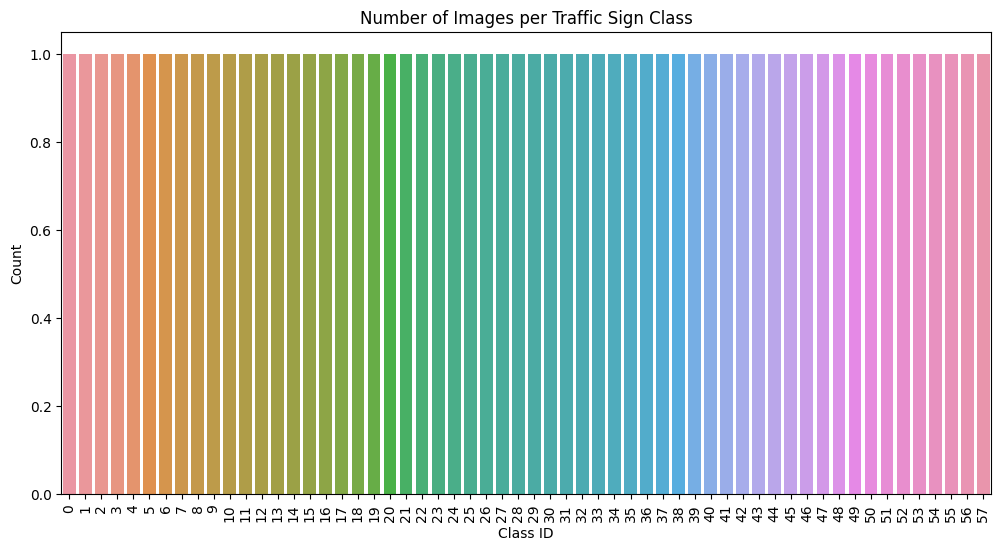

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='ClassId', data=df)
plt.title('Number of Images per Traffic Sign Class')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df['Name']   # using 'Name' as input
y = df['ClassId']  # target label

In [11]:
le = LabelEncoder()
X_encoded = le.fit_transform(X)  # convert text to numbers

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded.reshape(-1,1), y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       0.0
          34       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       0.0
          37       0.00      0.00      0.00       1.0
          38 

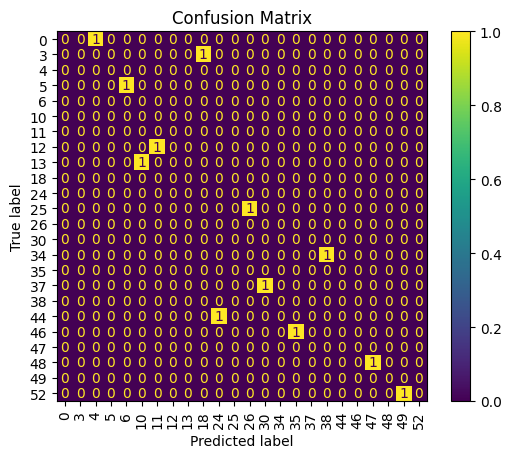

In [16]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()